<a href="https://colab.research.google.com/github/nikhita-gitub/apple-use/blob/main/Question_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **4. Data Pre-processing**


### **Purpose: In this section, we will prepare the dataset for analysis by performing essential pre-processing steps. These include segregating the predictors and target attributes, addressing any imbalance in the target variable, splitting the dataset into training and testing sets, and standardizing the data. Finally, we'll ensure that the training and testing sets share similar statistical characteristics.**



### **Objective: To ensure the data is clean, balanced, and ready for model training, with consistent characteristics between training and testing datasets.**

**Step 1: Importing libraries**

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore")

**Step 2: Segregate Predictors and Target Attributes**

**Overview: We start by separating the independent variables (predictors) from the dependent variable (target). This step is crucial because it allows us to focus on the relationships between the predictors and the target during the analysis.**


In [40]:
df = pd.read_csv('/content/signal-data.csv')

print(df.isnull().sum())

df = df.drop(columns=['Time'])

imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Display the data after imputation
print(df_imputed.isnull().sum())


X = df_imputed.drop(columns=['Pass/Fail'])  # Assuming 'Pass/Fail' is the target column
y = df_imputed['Pass/Fail']

X = df.drop('Pass/Fail', axis=1)
y = df['Pass/Fail']

print("Predictors shape:", X.shape)
print("Target shape:", y.shape)

Time          0
0             6
1             7
2            14
3            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 592, dtype: int64
0            0
1            0
2            0
3            0
4            0
            ..
586          0
587          0
588          0
589          0
Pass/Fail    0
Length: 591, dtype: int64
Predictors shape: (1567, 590)
Target shape: (1567,)


**Step 3: Check for Target Balancing**

**Overview: Imbalanced datasets, where one class significantly outnumbers others, can lead to biased models. To address this, we check the distribution of the target variable and use the Synthetic Minority Over-sampling Technique (SMOTE) if needed to balance the classes.**


Pass/Fail
-1    1463
 1     104
Name: count, dtype: int64
Number of NaNs remaining in X: 0


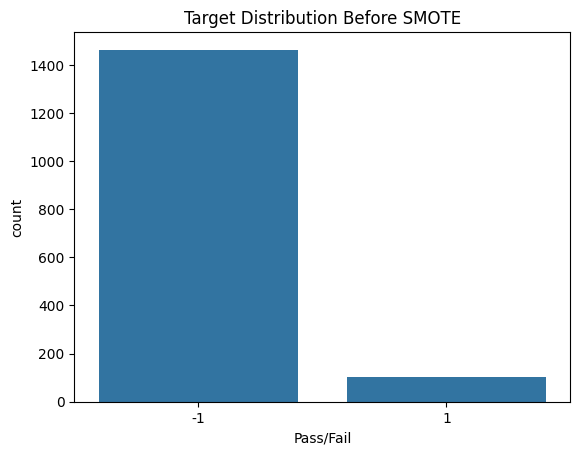

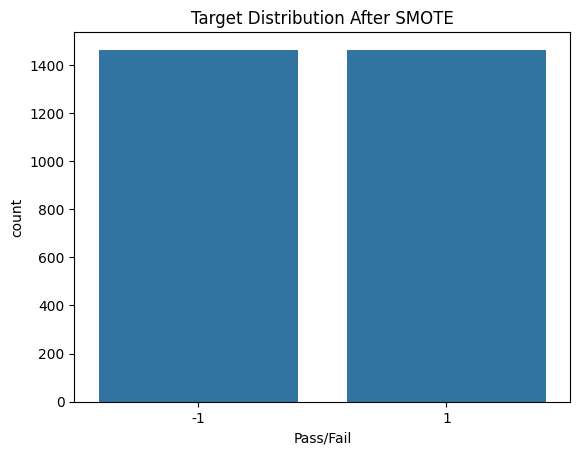

In [41]:
print(y.value_counts())
X = X.fillna(X.mean())
print("Number of NaNs remaining in X:", X.isna().sum().sum())

# Visualize target distribution
sns.countplot(x=y)
plt.title('Target Distribution Before SMOTE')
plt.show()

# Apply SMOTE to balance the target classes if necessary
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Visualize the new target distribution after SMOTE
sns.countplot(x=y_smote)
plt.title('Target Distribution After SMOTE')
plt.show()

**Step 4: Perform Train-Test Split**

**Overview: We split the dataset into training and testing sets. This split allows us to evaluate the model's performance on unseen data, ensuring its ability to generalize to new inputs. The stratify parameter ensures that the class distribution in the target variable remains consistent across both sets.**


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42, stratify=y_smote)

# Display shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2340, 590)
X_test shape: (586, 590)
y_train shape: (2340,)
y_test shape: (586,)


**Step 5: Standardize the Data**

**Overview: Standardization rescales the features to have a mean of 0 and a standard deviation of 1, ensuring that all features contribute equally to the model. This is particularly important for algorithms sensitive to the scale of input data, such as linear regression and k-nearest neighbors.**


In [47]:
scaler = StandardScaler()

# Fit on the training data and transform both train and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier analysis (optional)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


**Step 6: Check Statistical Characteristics**

**Overview: After splitting and standardizing the data, it’s essential to verify that the training and testing sets share similar statistical properties. This step helps to confirm that the training set accurately represents the test set, which is crucial for developing a robust model.**


In [46]:
print("Original Data Stats:")
print(X.describe())
print("Training Data Stats:")
print(X_train_scaled.describe())

print("\nTesting Data Stats:")
print(X_test_scaled.describe())


Original Data Stats:
                 0            1            2            3            4  \
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000   
mean   3014.452896  2495.850231  2200.547318  1396.376627     4.197013   
std      73.480613    80.227793    29.380932   439.712852    56.103066   
min    2743.240000  2158.750000  2060.660000     0.000000     0.681500   
25%    2966.665000  2452.885000  2181.099950  1083.885800     1.017700   
50%    3011.840000  2498.910000  2200.955600  1287.353800     1.317100   
75%    3056.540000  2538.745000  2218.055500  1590.169900     1.529600   
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600   

            5            6            7            8            9  ...  \
count  1567.0  1567.000000  1567.000000  1567.000000  1567.000000  ...   
mean    100.0   101.112908     0.121822     1.462862    -0.000841  ...   
std       0.0     6.209271     0.008936     0.073849     0.015107  ...   
min     100.0   